## 실습과제 :  대한민국 헌법 데이터를 읽고,
- 단어 빈도 막대 그래프 만들기
- 워드 클라우드 만들기

In [32]:
import re
import pandas as pd

# KoNLPy에서는 대한민국 헌법 말뭉치인 kolaw와 국회법안 말뭉치인 kobill을 제공
from konlpy.corpus import kolaw

In [33]:
# 말뭉치가 포함하는 파일의 이름은 fields 메서드로 알 수 있음
kolaw.fileids()

['constitution.txt']

In [34]:
# 대한민국 헌법 읽어오기
law = kolaw.open('constitution.txt').read()
law[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [35]:
# Okt(Open Korean Text) 만들기
# Twitter에서 만들 한국어 처리기 Twitter-korean-text를 활용하여 만든 한국어 형태소
from konlpy.tag import Okt
okt = Okt()

In [36]:
len(law)

18884

In [37]:
# 특수 문자, 숫자 등 삭제
law = re.sub('[^가-힣]', ' ', law)
law

'대한민국헌법  유구한 역사와 전통에 빛나는 우리 대한국민은    운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한     민주이념을 계승하고  조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의 인도와 동포애로써 민족의 단결을 공고히 하고  모든 사회적 폐습과 불의를 타파하며  자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치 경제 사회 문화의 모든 영역에 있어서 각인의 기회를 균등히 하고  능력을 최고도로 발휘하게 하며  자유와 권리에 따르는 책임과 의무를 완수하게 하여  안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서     년  월   일에 제정되고  차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다          제 장 총강   제 조   대한민국은 민주공화국이다   대한민국의 주권은 국민에게 있고  모든 권력은 국민으로부터 나온다    제 조   대한민국의 국민이 되는 요건은 법률로 정한다   국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다    제 조 대한민국의 영토는 한반도와 그 부속도서로 한다    제 조 대한민국은 통일을 지향하며  자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다    제 조   대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다   국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며  그 정치적 중립성은 준수된다    제 조   헌법에 의하여 체결 공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다   외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다    제 조   공무원은 국민전체에 대한 봉사자이며  국민에 대하여 책임을 진다   공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다    제 조   정당의 설립은 자유이며  복수정당

In [38]:
len(law)

18884

In [39]:
# 헌법에서 명사 추출하기
# hannanum 만들기
nouns = okt.nouns(law)
len(nouns)

4058

In [40]:
nouns[:30]

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '애']

In [44]:
# 1글자로 된 명사는 삭제
law_word = pd.DataFrame({'word' : nouns})
law_word['law_n'] = law_word['word'].str.len()
law_word = law_word.query('law_n >= 2')
law_word.sort_values('word')

,word,law_n
3658,가격,2
1349,가부,2
3241,가입,2
3338,가입,2
1093,가족,2
...,...,...
3983,후임,2
3972,후임,2
811,훈련,2
319,훈장,2


<AxesSubplot:xlabel='n', ylabel='word'>

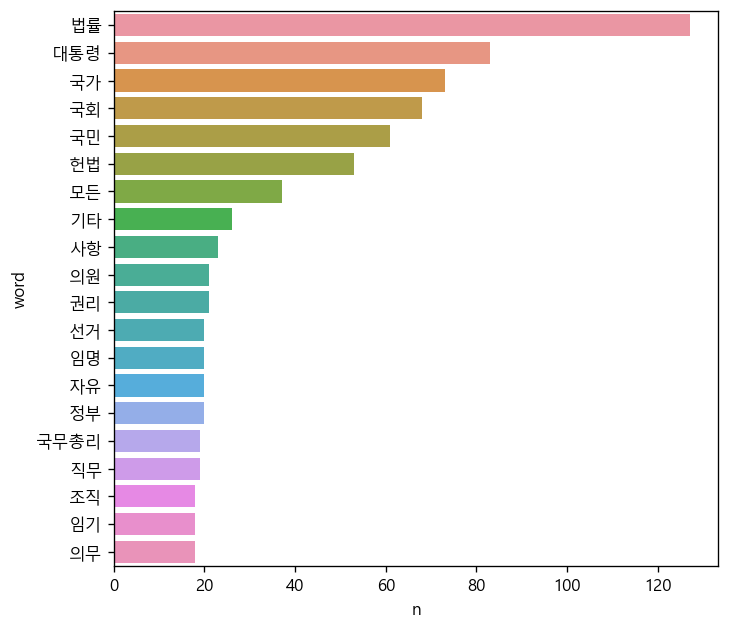

In [45]:
# 단어의 빈도표를 상위 20개 단어에 대해 막대 그래프로 그리시오

law_word = law_word.groupby('word', as_index=False) \
        .agg(n = ('word', 'count')) \
        .sort_values('n', ascending=False)

top20 = law_word.head(20)

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update( {'font.family' : 'malgun Gothic', 
                      'figure.dpi' : '120', 
                      'figure.figsize' : [6.5, 6]})

sns.barplot(data=top20, y='word', x='n')


In [46]:
# wordCloud를 그려보세요
!pip install wordcloud
font = 'DoHyeon-Regular.ttf'

law_word = law_word.set_index('word').to_dict()['n']

In [65]:
from wordcloud import WordCloud
import PIL

icon = PIL.Image.open('cloud.png')


import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

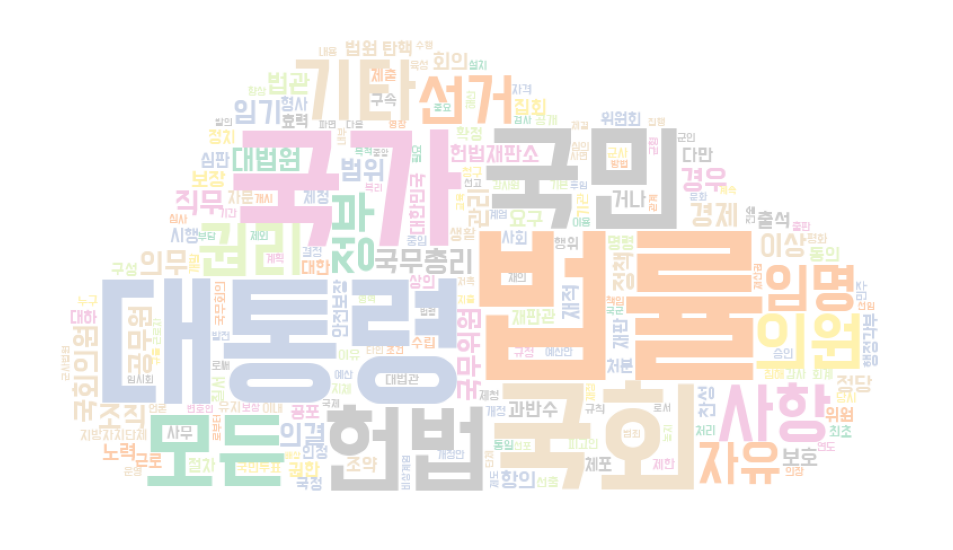

In [66]:
# wc 만들기
wc = WordCloud(random_state=1234,
               font_path = font,
               width = 400,
               height = 400,
               contour_width=3, 
               contour_color='white', 
               background_color = 'white',
               mask = img,
              colormap='Pastel2') 

img_wordcloud = wc.generate_from_frequencies(law_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)


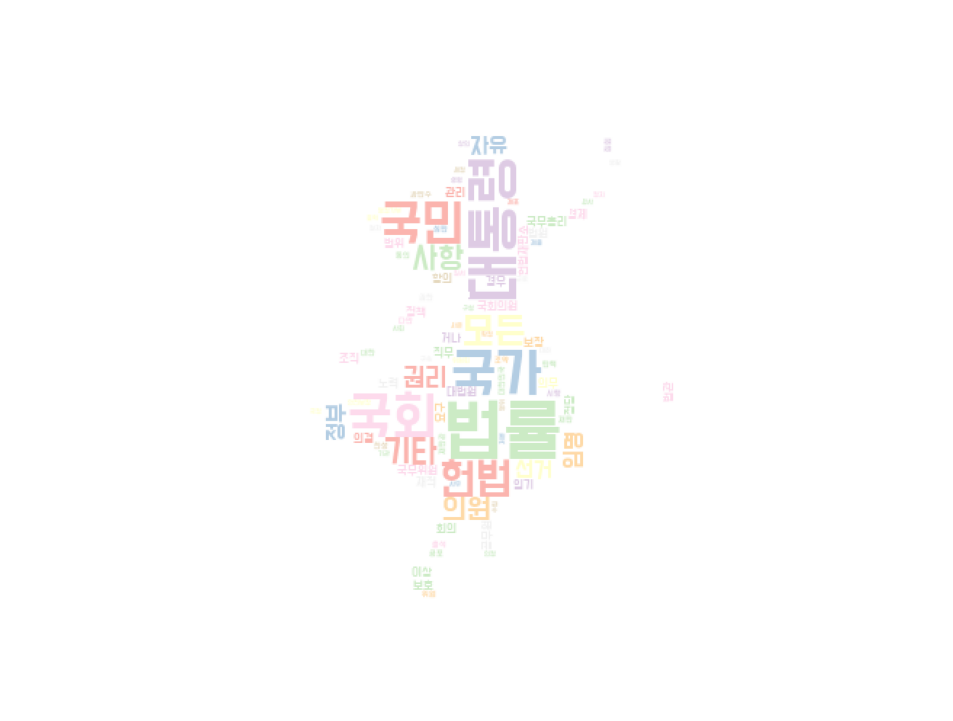

In [62]:
# 다양한 wordCloud mask image를 가져와 적용해 보세요
# wordCloud mask image 검색

icon = PIL.Image.open('abc.png')

import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

wc = WordCloud(random_state=1234,
               font_path = font,
               width = 400,
               height = 400,
               contour_width=3, 
               contour_color='white', 
               background_color = 'white',
               mask = img,
              colormap='Pastel1') 

img_wordcloud = wc.generate_from_frequencies(law_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)
